# Assignment 1: Data Parsing, Cleansing and Integration
## Task 1 and 2
#### Student Name: DEEPA ROSE THOMAS
#### Student ID: S3952532

Date: 17-08-2023

Version: 1.0

Environment: Python 3 and Jupyter notebook

Libraries used: please include the main libraries you used in your assignment
* pandas
* re
* numpy
* xml.etree.ElementTree
* BeautifulSoup

## Introduction
In this assessment, we will step into the role of a data analyst responsible for enhancing the job search system of various job hunting websites like seek.com and Azuna.com. The task involves working with a sizable collection of job advertisement records stored in XML format. These records tend to have uncertain data quality issues. Additionally,we need to integrate this data set with another source, managing any conflicts that arise during integration.

To summarise regarding the main objectives of this work is:

**Task 1: Data Parsing and Transformation**
We start by exploring the initial data set and understanding its format. By using appropriate Python libraries we aim to parse this data and convert it into a structured pandas dataframe, making it easier to work with and analyze.

**Task 2: Data Cleaning and Enhancement**
Once the data is parsed into a dataframe, the next objective is to delve deeper into the dataset. We need to identify any inconsistencies, missing values, or errors in the data. By using data cleaning techniques and tools, you'll rectify these issues and present the cleaned data in a specified format, ensuring its quality and reliability.

**Task 3: Data Integration and Conflict Resolution**
In the final task, we take the clean dataset produced in Task 2 and combine it with another dataset. As part of this integration, we have to  handle any differences in schema and merge the two datasets. Additionally, we have to check and address any discrepancies or conflicts that may arise at the data level. The aim is to create a cohesive, unified dataset that provides valuable insights without compromising data accuracy.

## Importing libraries 

In [1]:
# Code to import libraries as you need in this assessment, e.g.,
import pandas as pd
import xml.etree.ElementTree as etree
import numpy as np
import re
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## Task 1. Parsing Data

### 1.1. Examining and loading data

In [2]:
#loading the relevent xml file 
#Here we try to understand the tag structure of our xml document
tree = etree.parse("s3952532_dataset1.xml")
root = tree.getroot()
root.tag

'Ads'

In [3]:
#Checkin the number of records
len(root)

107

In [4]:
root[0]

<Element 'Source' at 0x000002B81F677D60>

In [5]:
root[0][0]

<Element 'Record' at 0x000002B81F677DB0>

In [6]:
#printing the source
for child in root:
    print (child)

<Element 'Source' at 0x000002B81F677D60>
<Element 'Source' at 0x000002B81FC98810>
<Element 'Source' at 0x000002B8201B0090>
<Element 'Source' at 0x000002B8204B40E0>
<Element 'Source' at 0x000002B8208E5EF0>
<Element 'Source' at 0x000002B820A475E0>
<Element 'Source' at 0x000002B820D65EF0>
<Element 'Source' at 0x000002B821EAB5E0>
<Element 'Source' at 0x000002B821F157C0>
<Element 'Source' at 0x000002B8221E1130>
<Element 'Source' at 0x000002B822270040>
<Element 'Source' at 0x000002B8222E8B80>
<Element 'Source' at 0x000002B822328450>
<Element 'Source' at 0x000002B8223CCCC0>
<Element 'Source' at 0x000002B82259FEF0>
<Element 'Source' at 0x000002B823278F40>
<Element 'Source' at 0x000002B823386220>
<Element 'Source' at 0x000002B8236C9860>
<Element 'Source' at 0x000002B823894DB0>
<Element 'Source' at 0x000002B823908B80>
<Element 'Source' at 0x000002B8239C4E00>
<Element 'Source' at 0x000002B823ACA860>
<Element 'Source' at 0x000002B823BCC900>
<Element 'Source' at 0x000002B823DC9A40>
<Element 'Source

In [7]:
#examining all the records
for child_src in root[0]:
    print(child_src)

<Element 'Record' at 0x000002B81F677DB0>
<Element 'Record' at 0x000002B81F680220>
<Element 'Record' at 0x000002B81F6805E0>
<Element 'Record' at 0x000002B81F6809F0>
<Element 'Record' at 0x000002B81F680DB0>
<Element 'Record' at 0x000002B81F682220>
<Element 'Record' at 0x000002B81F6825E0>
<Element 'Record' at 0x000002B81F6829F0>
<Element 'Record' at 0x000002B81F682E50>
<Element 'Record' at 0x000002B81F6842C0>
<Element 'Record' at 0x000002B81F6846D0>
<Element 'Record' at 0x000002B81F684AE0>
<Element 'Record' at 0x000002B81F684EF0>
<Element 'Record' at 0x000002B81F6853B0>
<Element 'Record' at 0x000002B81F685810>
<Element 'Record' at 0x000002B81F685BD0>
<Element 'Record' at 0x000002B81F688040>
<Element 'Record' at 0x000002B81F688450>
<Element 'Record' at 0x000002B81F688860>
<Element 'Record' at 0x000002B81F688CC0>
<Element 'Record' at 0x000002B81F68A130>
<Element 'Record' at 0x000002B81F68A540>
<Element 'Record' at 0x000002B81F68A9A0>
<Element 'Record' at 0x000002B81F68ADB0>
<Element 'Record

In [8]:
#Examining the tag structure
for child in root[0][0]:
    print(child)

<Element 'Id' at 0x000002B81F677E00>
<Element 'Title' at 0x000002B81F677E50>
<Element 'Location' at 0x000002B81F677EA0>
<Element 'Company' at 0x000002B81F677EF0>
<Element 'ContractType' at 0x000002B81F677F90>
<Element 'ContractTime' at 0x000002B81F680040>
<Element 'Category' at 0x000002B81F680090>
<Element 'Salary' at 0x000002B81F6800E0>
<Element 'Date' at 0x000002B81F680130>


***Inference*** : children of `root[0][0]` corresponds to the first record

***The General Observation and Findings about this xml document***

1. **XML Structure:**
   The data is structured using XML tags, with nested elements representing different attributes of job advertisements.</br></br>

2. **Source Information:**
   The `<Source>` tag contains metadata about the source of the job data. The attribute `Name` specifies that source from where the data is obtained. </br></br>
   
3. **Job Advertisement Records:**
   Job advertisements are organized within `<Record>` elements.
   Each `<Record>` contains information about a specific job, such as its `Id`, `Title`, `Location`, `Company`, `ContractType`, `ContractTime`, `Category`, `Salary`, `OpenDate`, and `CloseDate`. </br></br>

4. **Data Variability:**
   The job advertisements vary in terms of job titles, locations, companies, contract types, and other attributes.</br></br>

5. **Attributes:**
   - `Id`: A unique identifier for each job advertisement.
   - `Title`: The title of the advertised job position.
   - `Location`: The location of the job.
   - `Company`: The company or employer offering the job.
   - `ContractType`: The type of contract for the job (e.g., full-time, part-time, contract).
   - `ContractTime`: The duration of the contract (e.g., permanent, temporary).
   - `Category`: The job category or industry.
   - `Salary`: The salary offered for the job.
   - `OpenDate`: The date when the job application process opens.
   - `CloseDate`: The date when the job application process closes.</br></br>

6. **Data Quality and Format:**
   - The XML data appears to be well-structured and formatted, making it suitable for parsing and analysis.


<b><i> Inference: </i></b>The first level element here is `Ads`, lets explore the children of it

### 1.2 Parsing data into the required format

In [9]:
#Function to check null values for salary column
def get_salary_number(record,element):
    element_text = record.find(element)
    if element_text is None or element_text.text.strip() == '' or element_text.text == 'N/A' or element_text.text.strip() == ' ' or element_text.text.strip() == '-':
        return 0.0
    else:
        return element_text.text.strip()

In [10]:
#Function to check null values for salary column
def get_number(record,element):
    element_text = record.find(element)
    if element_text is None or element_text.text.strip() == '' or element_text.text.lower() == 'n/a':
        return None
    else:
        return element_text.text.strip()

In [11]:
#Function to check null values for non-numeric columns
def get_text(record,element):
    element_text = record.find(element)
    if element_text is None:
        return 'non specified'
    else:
        return element_text.text

In [12]:
#Function to check date
def get_open_date(record):
    date_text = record.find('.//OpenDate')
    return(date_text.text)
def get_close_date(record):
    date_text = record.find('.//CloseDate')
    return(date_text.text)

In [13]:
#list to store each records
data = []

In [14]:
#loop thorugh each Source
for source in root.findall(".//Source"):
    source_name = source.get('Name')
    for record in source.findall('.//Record'):
        record_details = {}
        record_details['Id'] = get_number(record,'Id')
        record_details['Title'] = get_text(record,'Title')
        record_details['Location'] = get_text(record,'Location')
        record_details['Company'] = get_text(record,'Company')
        record_details['ContractType'] = get_text(record,'ContractType')
        record_details['ContractTime'] = get_text(record,'ContractTime')
        record_details['Category'] = get_text(record,'Category')
        record_details['Salary'] = get_salary_number(record,'Salary')
        record_details['OpenDate'] = get_open_date(record)
        record_details['CloseDate'] = get_close_date(record)
        record_details['SourceName'] = source_name
        data.append(record_details)

In [15]:
#Parsing the data into dataframe
parsed_data = pd.DataFrame(data)

In [16]:
#examining the dataframe
parsed_data.head()

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
0,70519984,International Marketing Manager / Director,Manchester,A2Z School of English,N/A,permanent,"PR, Advertising & Marketing Jobs",32500,20120516T120000,20120615T120000,jobsite.co.uk
1,71857396,"Web Developer HTML, CSS, Wordpress (34 days p...",UK,Recruitment Revolution.Com Limited,N/A,permanent,IT Jobs,20500,20130518T150000,20130617T150000,jobsite.co.uk
2,71444746,"Sales Advisor (Events) Swindon covering SN , G...",UK,SMRS Limited new,N/A,permanent,Sales Jobs,34000,20130822T120000,20131021T120000,jobsite.co.uk
3,71707588,"Tester, Software Tester, Test Engineer",Leeds,Estio Technology Recruitment Limited,N/A,permanent,IT Jobs,26500,20130717T000000,20130816T000000,jobsite.co.uk
4,72679431,Territory Sales / Field Sales Executive,Norwich,Virtuoso Recruitment Limited,N/A,permanent,Sales Jobs,29500,20130710T000000,20130809T000000,jobsite.co.uk


***Inference***:<br>
- We have parsed the xml file into the dataframe. 
- Each row in the dataframe represents a job advertisement record
- All the columns are parsed with the required attribute names


## Task 2. Auditing and cleansing the loaded data
Here we perform the Audit and cleansing of the loaded data

#### 2.1 Getting a quick overview of the dataset

In [17]:
print(parsed_data.shape)
parsed_data.head()

(50753, 11)


,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
0,70519984,International Marketing Manager / Director,Manchester,A2Z School of English,N/A,permanent,"PR, Advertising & Marketing Jobs",32500,20120516T120000,20120615T120000,jobsite.co.uk
1,71857396,"Web Developer HTML, CSS, Wordpress (34 days p...",UK,Recruitment Revolution.Com Limited,N/A,permanent,IT Jobs,20500,20130518T150000,20130617T150000,jobsite.co.uk
2,71444746,"Sales Advisor (Events) Swindon covering SN , G...",UK,SMRS Limited new,N/A,permanent,Sales Jobs,34000,20130822T120000,20131021T120000,jobsite.co.uk
3,71707588,"Tester, Software Tester, Test Engineer",Leeds,Estio Technology Recruitment Limited,N/A,permanent,IT Jobs,26500,20130717T000000,20130816T000000,jobsite.co.uk
4,72679431,Territory Sales / Field Sales Executive,Norwich,Virtuoso Recruitment Limited,N/A,permanent,Sales Jobs,29500,20130710T000000,20130809T000000,jobsite.co.uk


***Inferene :***
We have 50753 rows and 11 columns

In [18]:
parsed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50753 entries, 0 to 50752
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            50753 non-null  object
 1   Title         50753 non-null  object
 2   Location      50753 non-null  object
 3   Company       50753 non-null  object
 4   ContractType  50753 non-null  object
 5   ContractTime  50753 non-null  object
 6   Category      50753 non-null  object
 7   Salary        50753 non-null  object
 8   OpenDate      50753 non-null  object
 9   CloseDate     50753 non-null  object
 10  SourceName    50753 non-null  object
dtypes: object(11)
memory usage: 4.3+ MB


In [19]:
parsed_data.isna().sum()

Id              0
Title           0
Location        0
Company         0
ContractType    0
ContractTime    0
Category        0
Salary          0
OpenDate        0
CloseDate       0
SourceName      0
dtype: int64

***Inference***<br>
- All the columns are of string type, which we need to convert into required types
- All the null values have been handled while parsing and the resultant dataframe has no null values

#### 2.1 Domain values
Here we are checking the domain values for all columns

In [20]:
#Building an error list to get all the error or inconsistent values in Salary column
error_list = []

In [21]:
for idx, row in parsed_data.iterrows():
    salary_string = str(row['Salary'])
    # Record errors in the error list
    if 'per hour' in salary_string or ' p/h ' in salary_string:
        hourly_value = re.search(r'\d+\.\d+', salary_string)
        if hourly_value:
            hourly_value = float(hourly_value.group())
            annual_value = hourly_value * 40 * 52
            error_list.append({
                'indexOfdf': idx,
                'Id': row['Id'],
                'ColumnName': 'Salary',
                'Original': salary_string,
                'Modified': str(annual_value),
                'ErrorType': 'hourly value',
                'Fixing': 'convert to annual value by considering 40 hours per week'
            })
    elif '-' in salary_string or ' to ' in salary_string or ' - ' in salary_string or ' ~ ' in salary_string:
        numerical_values = re.findall(r'\d+', salary_string)
        if numerical_values:
            numerical_values = list(map(float, numerical_values))
            average_value = sum(numerical_values) / len(numerical_values)  
            error_list.append({
                'indexOfdf': idx,
                'Id': row['Id'],
                'ColumnName': 'Salary',
                'Original': salary_string,
                'Modified': str(average_value),
                'ErrorType': 'range value',
                'Fixing': 'selected the average value'
            })
    elif not salary_string or salary_string == 'N/A':
        error_list.append({
            'indexOfdf': idx,
            'Id': row['Id'],
            'ColumnName': 'Salary',
            'Original': 'N/A',
            'Modified': '0.00',
            'ErrorType': 'invalid value',
            'Fixing': 'set the value to 0.00'
        })
    elif 'k' in salary_string:
        numerical_value = re.search(r'\d+', salary_string)
        if numerical_value:
            modified_salary = float(numerical_value.group()) * 1000
            error_list.append({
                'indexOfdf': idx,
                'Id': row['Id'],
                'ColumnName': 'Salary',
                'Original': salary_string,
                'Modified': str(modified_salary),
                'ErrorType': 'k used instead of 1000',
                'Fixing': 'multiplied by 1000'
            })
    elif '/' in salary_string or 'perAnnum' in salary_string:
        numerical_value = re.search(r'\d+', salary_string)
        if numerical_value:
            modified_salary = float(numerical_value.group())
            error_list.append({
                'indexOfdf': idx,
                'Id': row['Id'],
                'ColumnName': 'Salary',
                'Original': salary_string,
                'Modified': str(modified_salary),
                'ErrorType': 'character values found',
                'Fixing': 'only using numerical value'
            })
    

In [22]:
#Creating a dataframe to store the errorlist
error_df = pd.DataFrame(error_list)

In [23]:
#ID COLUMN
# 1. Checking if it has 8 digits
# 2. Data type has to be Integer 

In [24]:
#user defined function to convert Id to integer
def check_id(Id):
    return(int(Id))
    

In [25]:
parsed_data['Id'] = parsed_data['Id'].apply(check_id)

In [26]:
#TITLE COLUMN, LOCATION COLUMN & COMPANY COLUMN
# 1. Checking for null values
# 2. Replacing None with 'non specified'

In [27]:
def remove_space(attribute):
    if attribute == 'N/A' or attribute == '-' or attribute is None or attribute == '' or attribute == ' ' or attribute == '.':
        return 'non specified'
    else:
        return attribute.strip()   

In [28]:
parsed_data['Title'] = parsed_data['Title'].apply(remove_space)
parsed_data['Location'] = parsed_data['Location'].apply(remove_space)
parsed_data['Company'] = parsed_data['Company'].apply(remove_space)

In [29]:
#CONTRACT TYPE COLUMN
#1. 3 values - full_time, part_time or non-specified

In [30]:
def clean_contract(attribute):
    if attribute == 'N/A' or attribute == '-' or attribute is None or attribute == '' or attribute == ' ':
        return 'non specified'
    else:
        return attribute.strip()

In [31]:
parsed_data['ContractType'].value_counts()

N/A              13902
                 12406
full_time        11249
non specified     7895
-                 3880
part_time         1421
Name: ContractType, dtype: int64

In [32]:
parsed_data['ContractType'] = parsed_data['ContractType'].apply(clean_contract)

In [33]:
parsed_data['ContractType'].value_counts()

non specified    38083
full_time        11249
part_time         1421
Name: ContractType, dtype: int64

In [34]:
# CONTARCT TIME COLUMN
#1. 3 values - permanent, contract or non -specified

In [35]:
parsed_data['ContractTime'].value_counts()

permanent        31024
non specified     8357
contract          5628
                  4477
-                  707
N/A                560
Name: ContractTime, dtype: int64

In [36]:
parsed_data['ContractTime'] = parsed_data['ContractTime'].apply(clean_contract)

In [37]:
parsed_data['ContractTime'].value_counts()

permanent        31024
non specified    14101
contract          5628
Name: ContractTime, dtype: int64

***Inferene:***
Id, Title, ContractTime and ContractType columnns have been cleaned and the inconsistent values have been replaced with non-specified as required

In [38]:
#CATEGORY COLUMN
# There are 8 possible categories: ‘IT Jobs’, ‘Healthcare & Nursing Jobs’, 
# ‘Engineering Jobs’, ‘Accounting & Finance Jobs’, ‘Sales Jobs’, ‘Hospitality & Catering 
# Jobs’, ‘Teaching Jobs’, ‘PR, Advertising & Marketing Jobs’

In [39]:
parsed_data['Category'].value_counts()

IT Jobs                             13118
Healthcare & Nursing Jobs            8071
Engineering Jobs                     7523
Accounting & Finance Jobs            6779
Sales Jobs                           4880
Hospitality & Catering Jobs          4400
Teaching Jobs                        3469
PR, Advertising & Marketing Jobs     2513
Name: Category, dtype: int64

In [40]:
parsed_data['Category'].unique()

array(['PR, Advertising & Marketing Jobs', 'IT Jobs', 'Sales Jobs',
       'Engineering Jobs', 'Accounting & Finance Jobs',
       'Healthcare & Nursing Jobs', 'Teaching Jobs',
       'Hospitality & Catering Jobs'], dtype=object)

***Inferenence*** - Category column appears to be already in the required format

In [41]:
# SALARY COLUMN
# 1. All values has to be Float and in 2 decimal places
# 2. Not null
# 3. Valid float numbers
# 4. Annual Salary

In [42]:
#function to clean the non-numeric salary columns
def clean_salary(salary_attribute): 
    
    if not isinstance(salary_attribute, str):
        salary_attribute = str(salary_attribute)
        
    if not(salary_attribute.isnumeric()):   
        
        pattern1 = r'(\d+)/[yY]ear'#/year
        pattern2 = r'(\d+)\s*[pP]er[aA]nnum'# perAnnum matching
        pattern3 = r'(\d+)\s*-\s*(\d+)'#range - matching
        pattern4 = r'(\d+)\s*~\s*(\d+)'#range ~ matching
        pattern5 = r'(\d+)\s*to\s*(\d+)'#range to matching
        pattern6 = r'(\d+)[kK]' #k matching
        pattern7 = r'(\d+\.?\d+)\s*[pP]/[hH]'# p/h matching
        pattern8 = r'(\d+\.?\d+)\s*[pP]er\s*[hH]our'#per hour matching
        match1 = re.search(pattern1,salary_attribute)
        match2 = re.search(pattern2,salary_attribute)
        match3 = re.search(pattern3,salary_attribute)
        match4 = re.search(pattern4,salary_attribute)
        match5 = re.search(pattern5,salary_attribute)
        match6 = re.search(pattern6,salary_attribute)
        match7 = re.search(pattern7,salary_attribute)
        match8 = re.search(pattern8,salary_attribute)
        if match1:
            salary = float(match1.group(1))#/year
        elif match2:
            salary = float(match2.group(1))#perannum
        elif match3:
            salary1 = float(match3.group(1))#range - 
            salary2 = float(match3.group(2))
            salary = (salary1+salary2)/2 #Getting the average of the range values
        elif match4:
            salary1 = float(match4.group(1))#range ~
            salary2 = float(match4.group(2))
            salary = (salary1+salary2)/2 #Getting the average of the range values
        elif match5:
            salary1 = float(match5.group(1)) #range to
            salary2 = float(match5.group(2))
            salary = (salary1+salary2)/2 #Getting the average of the range values
        elif match6:
            salary = float(match6.group(1))*1000 #k #Converting to annual value by *1000
        elif match7:
            salary = float(match7.group(1))*40*52#p/h - Assuming a 40 hour work week and 52 weeks of working
        elif match8:
            salary = float(match8.group(1))*40*52# per hour            
        else:            
            salary = float(salary_attribute)           
    elif salary_attribute.strip() == '' or salary_attribute.strip() == ' ':
        salary = 0.00    
    else:
        salary = float(salary_attribute)
    return "{:2f}".format(salary)      

In [43]:
parsed_data['Salary'] = parsed_data['Salary'].apply(clean_salary)

In [44]:
parsed_data['Salary'] = parsed_data['Salary'].astype(float)

In [45]:
parsed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50753 entries, 0 to 50752
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            50753 non-null  int64  
 1   Title         50753 non-null  object 
 2   Location      50753 non-null  object 
 3   Company       50753 non-null  object 
 4   ContractType  50753 non-null  object 
 5   ContractTime  50753 non-null  object 
 6   Category      50753 non-null  object 
 7   Salary        50753 non-null  float64
 8   OpenDate      50753 non-null  object 
 9   CloseDate     50753 non-null  object 
 10  SourceName    50753 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.3+ MB


In [46]:
parsed_data['Salary'].describe()

count    5.075300e+04
mean     3.316282e+04
std      6.488058e+04
min      0.000000e+00
25%      2.200000e+04
50%      3.000000e+04
75%      4.200000e+04
max      1.000000e+07
Name: Salary, dtype: float64

***Inference:***
Salary column has been cleaned of any inconsistent formats and converted into float as required

In [47]:
#OPEN DATE & CLOSE DATE COLUMN

# Define a custom conversion function
def convert_date(date_string):
    match = re.match(r'(\d{4})(\d{2})(\d{2})T(\d{2})(\d{2})(\d{2})', date_string)
    if match:
        year, month, day, hour, minute, second = match.groups()
        return f"{year}-{month}-{day} {hour}:{minute}:{second}"
    else:
        return date_string

In [48]:
parsed_data['OpenDate'] = parsed_data['OpenDate'].apply(convert_date)
parsed_data['CloseDate'] = parsed_data['CloseDate'].apply(convert_date)

In [49]:
parsed_data['OpenDate'] = pd.to_datetime(parsed_data['OpenDate'], errors='coerce', format='%Y-%m-%d %H:%M:%S')
parsed_data['CloseDate'] = pd.to_datetime(parsed_data['CloseDate'], errors='coerce', format='%Y-%m-%d %H:%M:%S')

In [50]:
parsed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50753 entries, 0 to 50752
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            50753 non-null  int64         
 1   Title         50753 non-null  object        
 2   Location      50753 non-null  object        
 3   Company       50753 non-null  object        
 4   ContractType  50753 non-null  object        
 5   ContractTime  50753 non-null  object        
 6   Category      50753 non-null  object        
 7   Salary        50753 non-null  float64       
 8   OpenDate      50752 non-null  datetime64[ns]
 9   CloseDate     50753 non-null  datetime64[ns]
 10  SourceName    50753 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(7)
memory usage: 4.3+ MB


In [51]:
parsed_data.head()

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
0,70519984,International Marketing Manager / Director,Manchester,A2Z School of English,non specified,permanent,"PR, Advertising & Marketing Jobs",32500.0,2012-05-16 12:00:00,2012-06-15 12:00:00,jobsite.co.uk
1,71857396,"Web Developer HTML, CSS, Wordpress (34 days p...",UK,Recruitment Revolution.Com Limited,non specified,permanent,IT Jobs,20500.0,2013-05-18 15:00:00,2013-06-17 15:00:00,jobsite.co.uk
2,71444746,"Sales Advisor (Events) Swindon covering SN , G...",UK,SMRS Limited new,non specified,permanent,Sales Jobs,34000.0,2013-08-22 12:00:00,2013-10-21 12:00:00,jobsite.co.uk
3,71707588,"Tester, Software Tester, Test Engineer",Leeds,Estio Technology Recruitment Limited,non specified,permanent,IT Jobs,26500.0,2013-07-17 00:00:00,2013-08-16 00:00:00,jobsite.co.uk
4,72679431,Territory Sales / Field Sales Executive,Norwich,Virtuoso Recruitment Limited,non specified,permanent,Sales Jobs,29500.0,2013-07-10 00:00:00,2013-08-09 00:00:00,jobsite.co.uk


***Inference :***
The OpenDate and CloseDate columns have been converted to date type

#### Data Cleansing

**DUPLICATE ROWS**

In [52]:
#Checking for inconsistencies in data
#1. Duploicate Rows
#2. Checking subset with all fields except ID different
duplicate_rows = parsed_data[parsed_data.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Id, Title, Location, Company, ContractType, ContractTime, Category, Salary, OpenDate, CloseDate, SourceName]
Index: []


***Inference***
We dont have any rows with all columns being the same

In [53]:

duplicate_rows_subset = parsed_data[parsed_data.duplicated(subset=['Title','Location','ContractType','ContractTime','Category','Salary','OpenDate','CloseDate','SourceName'])]

In [54]:
duplicate_rows_subset.head(10)

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
45752,70579354,Executive Search Associate,The City,Truenorth,non specified,permanent,Sales Jobs,22500.0,2013-04-27 15:00:00,2013-07-26 15:00:00,tntjobs.co.uk
46999,70579330,Project Controller/Project Planner,Stevenage,non specified,non specified,permanent,Engineering Jobs,34000.0,2013-08-25 15:00:00,2013-10-24 15:00:00,securityclearedjobs.com
47862,70579338,Senior Consultant New Business,Central London,Unicorn Jobs.,full_time,permanent,"PR, Advertising & Marketing Jobs",40000.0,2012-01-24 00:00:00,2012-04-23 00:00:00,PR Week Jobs
50348,70579346,Clinical Assessor Trainer,West Lothian,NHS Lanarkshire,non specified,non specified,Healthcare & Nursing Jobs,29858.0,2012-03-16 15:00:00,2012-04-15 15:00:00,jobs.scot.nhs.uk


In [55]:
parsed_data_no_duplicates = parsed_data.drop_duplicates(subset=['Title', 'Location', 'ContractType', 'ContractTime', 'Category', 'Salary', 'OpenDate', 'CloseDate', 'SourceName'])

In [56]:
parsed_data_no_duplicates.shape

(50749, 11)

***Inference***
Dropped these columns

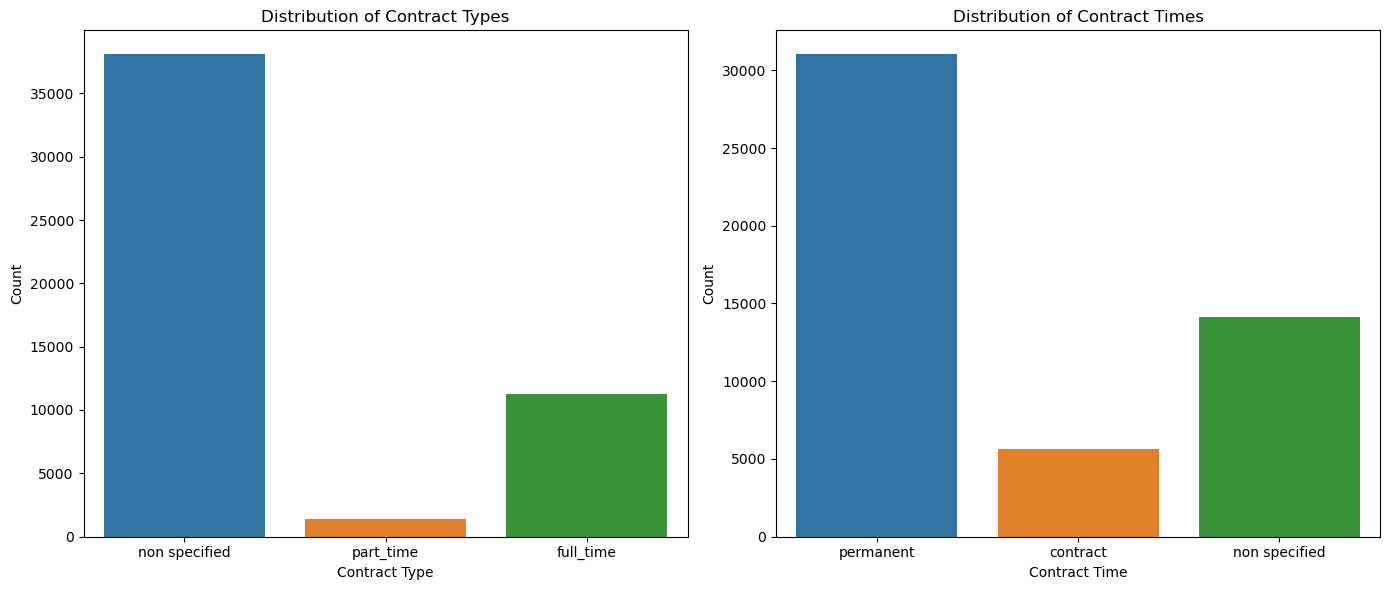

In [57]:
#2. CONTRACT TYPE AND CONTRACT TIME COLUMNS
#Checking the distribution of these columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Create bar plot for ContractType
sns.countplot(data=parsed_data_no_duplicates, x='ContractType', ax=axes[0])
axes[0].set_xlabel('Contract Type')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Contract Types')

# Create bar plot for ContractTime
sns.countplot(data=parsed_data_no_duplicates, x='ContractTime', ax=axes[1])
axes[1].set_xlabel('Contract Time')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of Contract Times')


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

**DISTRIBUTION FOR CATEGORICAL COLUMNS**

**OUTLIERS**

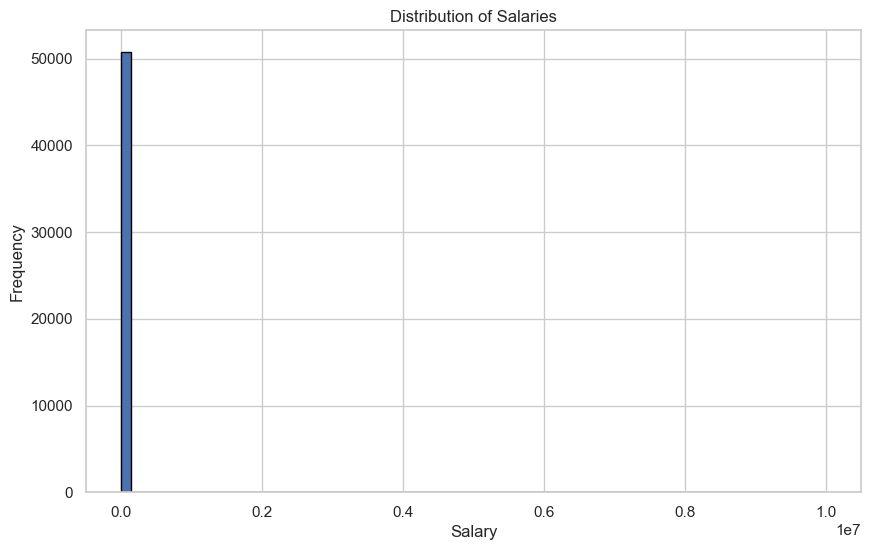

In [59]:
#Checking distribution of salaries
plt.figure(figsize=(10,6))
plt.hist(parsed_data_no_duplicates['Salary'], bins=75, edgecolor='black')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Salaries')
plt.show()

In [61]:
# Calculate z-scores for 'Salary' column
# Calculate z-scores for 'Salary' column
z_scores = np.abs((parsed_data_no_duplicates['Salary'] - parsed_data_no_duplicates['Salary'].mean()) / parsed_data_no_duplicates['Salary'].std())

# Set a threshold for outlier detection (e.g., z-score greater than 3)
threshold = 3

# Identify outlier rows
outlier_rows = parsed_data_no_duplicates[z_scores > threshold]

# Drop outlier rows from the DataFrame
parsed_data_no_outliers = parsed_data_no_duplicates[~(z_scores > threshold)]

print("Outlier rows:")
outlier_rows.head()


Outlier rows:


,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
7267,46633885,Assisted Living Manager Manchester,Cheadle,non specified,full_time,non specified,Healthcare & Nursing Jobs,10000000.0,2013-08-25 00:00:00,2013-11-23 00:00:00,careworx.co.uk
33997,68839307,PHP/MySQL Web Developer,Surrey,Extech 2000 Recruitment Limited,full_time,permanent,IT Jobs,10000000.0,2012-07-02 15:00:00,2012-08-31 15:00:00,planetrecruit.com


***Inference***

We have 2 columns with salary exceeding the normal ranges, for the ease of analysis and maintaining data quality, I choose to remove these 2 columns

In [62]:
# Drop outlier rows from the DataFrame
final_data = parsed_data_no_duplicates.drop(outlier_rows.index)

***Inference***
Outliers rows are dropped

In [64]:
final_data.shape

(50747, 11)

**DATE COLUMN**

In [65]:
# Identify rows where OpenDate > CloseDate
inconsistent_dates = final_data[final_data['OpenDate'] > final_data['CloseDate']]
inconsistent_dates.head(10)

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
866,69251089,Advertising Sales Executive Call Centre,Manchester,Loot Ltd,non specified,permanent,Sales Jobs,14000.0,2012-06-13 15:00:00,2012-03-15 15:00:00,jobsite.co.uk
8490,68310088,Oncology Registered Nurse Central London London,London,HCL Permanent,full_time,non specified,Healthcare & Nursing Jobs,30250.0,2012-10-29 12:00:00,2012-09-29 12:00:00,staffnurse.com
25574,69830598,Senior ICT Technician,UK,non specified,full_time,permanent,Teaching Jobs,17978.0,2012-09-17 00:00:00,2012-06-19 00:00:00,fish4.co.uk
26274,70321854,Commercial Project Manager ?? Tenders and Bids...,UK,JOBG8,full_time,permanent,Sales Jobs,34999.0,2013-03-05 15:00:00,2013-02-03 15:00:00,fish4.co.uk
41513,69260353,Support Share Plan Administrator,Ipswich,non specified,non specified,permanent,Accounting & Finance Jobs,13000.0,2013-10-20 12:00:00,2013-08-21 12:00:00,hays.co.uk


In [66]:
for index, row in inconsistent_dates.iterrows():
    open_month = row['OpenDate'].month
    new_close_date = row['CloseDate'].replace(month=open_month)
    final_data.at[index, 'CloseDate'] = new_close_date

In [67]:
inconsistent_dates = final_data[final_data['OpenDate'] > final_data['CloseDate']]
inconsistent_dates.head(10)

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
26274,70321854,Commercial Project Manager ?? Tenders and Bids...,UK,JOBG8,full_time,permanent,Sales Jobs,34999.0,2013-03-05 15:00:00,2013-03-03 15:00:00,fish4.co.uk


***Inference***

We have 1 rows where `CloseDate` is before the `OpenDate`. Because these rows does not make any sense to the user, I have decided to drop this row

In [68]:
final_data_cleaned = final_data.drop(inconsistent_dates.index)

In [69]:
#Checking for null open date column
null_date = final_data_cleaned[final_data_cleaned['OpenDate'].isna()]
null_date.head()

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
24362,68633346,Chef de Partie **** Star Hotel Derbyshire DE**...,Loughborough,CVbrowser,full_time,permanent,Hospitality & Catering Jobs,16500.0,NaT,2012-10-27 15:00:00,cvbrowser.com


We have one column where OpenDate is NaT, and we choose to remove this column as it does not make sense to the user.

In [70]:
data_cleaned = final_data_cleaned.drop(null_date.index)

In [71]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50745 entries, 0 to 50752
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            50745 non-null  int64         
 1   Title         50745 non-null  object        
 2   Location      50745 non-null  object        
 3   Company       50745 non-null  object        
 4   ContractType  50745 non-null  object        
 5   ContractTime  50745 non-null  object        
 6   Category      50745 non-null  object        
 7   Salary        50745 non-null  float64       
 8   OpenDate      50745 non-null  datetime64[ns]
 9   CloseDate     50745 non-null  datetime64[ns]
 10  SourceName    50745 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(7)
memory usage: 4.6+ MB


In [72]:
data_cleaned.isna().sum()

Id              0
Title           0
Location        0
Company         0
ContractType    0
ContractTime    0
Category        0
Salary          0
OpenDate        0
CloseDate       0
SourceName      0
dtype: int64

## Saving data
Save the parsed and cleaned data as well as the error list, named as:
- \<student\_id\>_dataset1_solution.csv
- \<student\_id\>_errorlist.csv

In [73]:
# code to save output data
data_cleaned.to_csv('s3952532_dataset1_solution.csv', index=False)

## Summary
The assessment simulates the role of a data analyst tasked with enhancing job search systems for websites like seek.com and Azuna.com. The objectives encompass three key tasks. 

**Task 1: Data Parsing and Transformation**

The initial step involves parsing XML-format job advertisement records using Python libraries to convert them into a structured pandas dataframe. This transformation enables efficient data manipulation and analysis.

**Task 2: Data Cleaning and Enhancement**

Following parsing, the focus shifts to identifying and rectifying data inconsistencies, missing values, and errors. Employing data cleaning techniques, the goal is to ensure the dataset's reliability and quality by addressing issues that could compromise analysis.

In this stage, we checked for null and incorrect values and handled them by making suitable replacements. We also checked for undesirable datatypes and converted these attributes into their right types, after handling the inconsistency in the values. Duplicate rows and constraint violations are also checked and corrective measures are taken.

We have maintained a track of the cleansing steps we undertook by maintaining an error list. Finally we saved the modified dataframe into a csv file for later use.

This assessment underscores skills in data manipulation, analysis, and decision-making, emphasizing the importance of producing a reliable and unified dataset that facilitates meaningful insights.